In [25]:
import random
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
# load the data
df = pd.read_csv('./weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#get response and variables
data=df.loc[:,
            ['MinTemp','MaxTemp','Rainfall','Evaporation',
           'Sunshine','WindGustSpeed','Humidity9am','Humidity3pm',
           'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm',
           'Temp9am','Temp3pm','RainToday','RainTomorrow']]

#change yes/no to 1/0  
data['RainToday'] = data['RainToday'].map({'Yes':1 ,'No':0})
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes':1 ,'No':0})

# imputation

In [4]:
#imputation
imp = IterativeImputer(max_iter=45,random_state=0)
imp.fit(data)
output=imp.transform(data)
imputed_data = pd.DataFrame(output, columns = 
            ['MinTemp','MaxTemp','Rainfall','Evaporation',
           'Sunshine','WindGustSpeed','Humidity9am','Humidity3pm',
           'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm',
           'Temp9am','Temp3pm','RainToday','RainTomorrow'])

# round RainToday and RainTomorrow
imputed_data['RainToday']=round(imputed_data['RainToday'])
imputed_data['RainTomorrow']=round(imputed_data['RainTomorrow'])

# partitioning

In [5]:
# get predictors
x = imputed_data.loc[:,['MinTemp','MaxTemp','Rainfall','Evaporation',
           'Sunshine','WindGustSpeed','Humidity9am','Humidity3pm',
           'Pressure9am','Pressure3pm','Cloud9am','Cloud3pm',
           'Temp9am','Temp3pm','RainToday']]
x.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,6.399821,6.897215,44.0,71.0,22.0,1007.7,1007.1,8.000000,5.123712,16.9,21.8,0.0
1,7.4,25.1,0.0,6.454563,10.999473,44.0,44.0,25.0,1010.6,1007.8,1.751276,2.674188,17.2,24.3,0.0
2,12.9,25.7,0.0,8.668520,11.645582,46.0,38.0,30.0,1007.6,1008.7,1.992966,2.000000,21.0,23.2,0.0
3,9.2,28.0,0.0,6.694127,11.389500,24.0,45.0,16.0,1017.6,1012.8,1.304593,2.025941,18.1,26.5,0.0
4,17.5,32.3,1.0,7.549974,5.589789,41.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0


In [6]:
# get response
y=imputed_data.loc[:,['RainTomorrow']]
y=abs(y)
y.head(5)


,RainTomorrow
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [7]:
#data partitioning, train = 70%, validation=20%, test=10%
x_train, x_validate, x_test = np.split(x.sample(frac=1), [int(.7*len(x)), int(.9*len(x))])
y_train, y_validate, y_test = np.split(y.sample(frac=1), [int(.7*len(y)), int(.9*len(y))])

# Decision Tree

In [8]:
# build a tree with simple setting
model1 = tree.DecisionTreeClassifier(random_state=0)
tree1 = model1.fit(x_train,y_train)

In [9]:
# test the model1
print("trainning accuracy:")
train_acc1= tree1.predict(x_train)
print(accuracy_score(train_acc1,y_train))
print("validation accuracy:")
prediction1=tree1.predict(x_validate)
print(accuracy_score( prediction1,y_validate))

trainning accuracy:
0.9996562628901416
validation accuracy:
0.6429946377010862


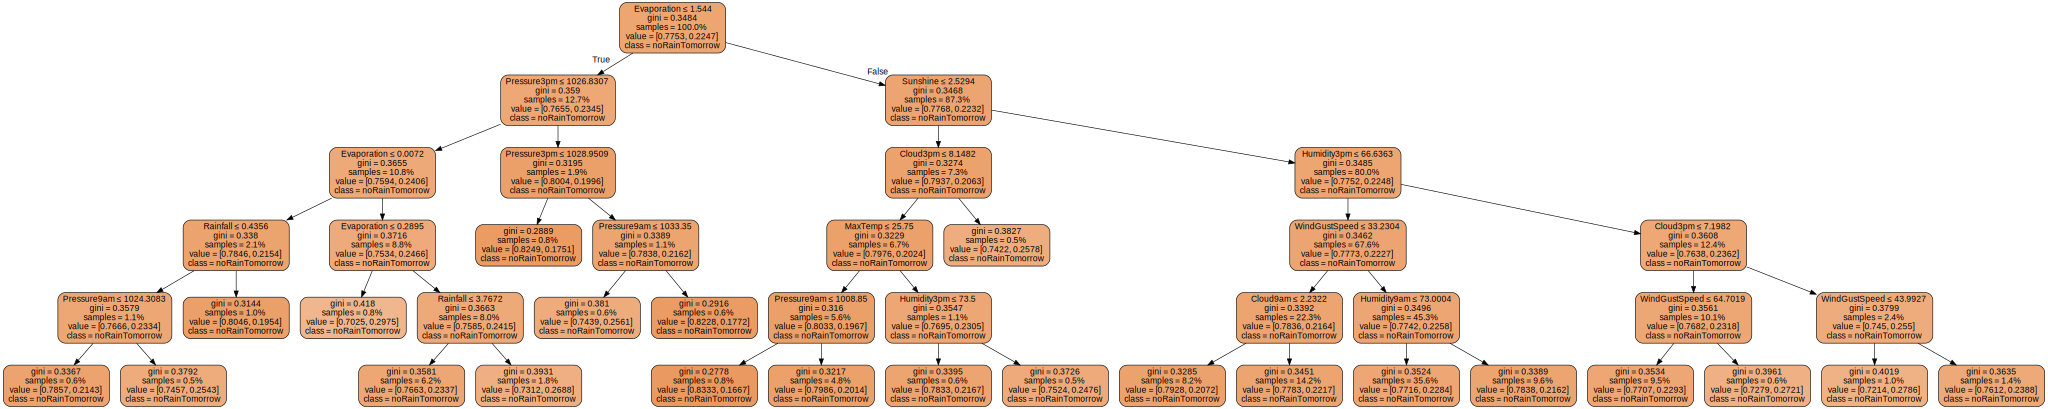

In [58]:
# build a tree by just increasing the minimun samples leaf
model2 = tree.DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_leaf=500)
tree2 = model2.fit(x_train,y_train)
dot_data = tree.export_graphviz(tree2, out_file=None,
                                feature_names=list(x_train.columns),  
                                class_names=["noRainTomorrow","RainTomorrow"],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                proportion=True,
                                precision=4
                               )
graph = graphviz.Source(dot_data) 
graph.format = 'png'
graph.render('dtree_render',view=True)
graph

In [18]:
# test the model2
print("trainning accuracy:")
train_acc2= tree2.predict(x_train)
print(accuracy_score(train_acc2,y_train))
print("validation accuracy:")
prediction2=tree2.predict(x_validate)
print(accuracy_score(y_validate, prediction2))

trainning accuracy:
0.775323603936281
validation accuracy:
0.781830056372886


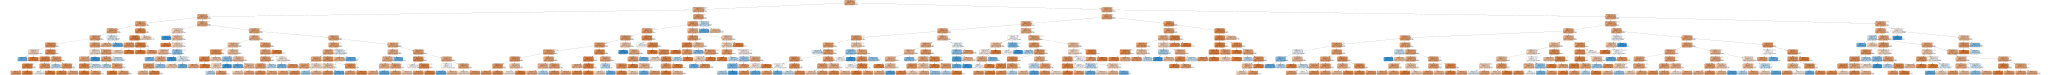

In [19]:
# build a tree by just increasing maximun depth
model3 = tree.DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_leaf=5)
tree3 = model3.fit(x_train,y_train)
dot_data = tree.export_graphviz(tree3, out_file=None,
                                feature_names=list(x_train.columns),  
                                class_names=["noRainTomorrow","RainTomorrow"],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                proportion=True,
                                precision=4
                               )
graph = graphviz.Source(dot_data) 
graph

In [20]:
# test the model3
print("trainning accuracy:")
train_acc3= tree3.predict(x_train)
print(accuracy_score(train_acc3,y_train))
print("validation accuracy:")
prediction3=tree3.predict(x_validate)
print(accuracy_score(y_validate, prediction3))

trainning accuracy:
0.7784859853469781
validation accuracy:
0.7779802007424722


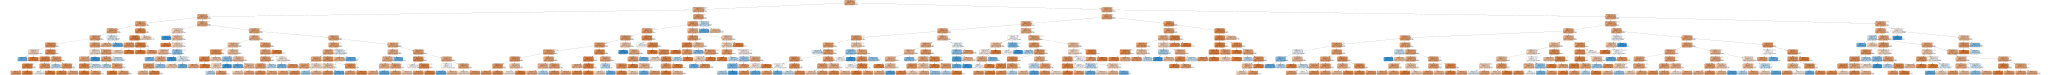

In [21]:
# build a tree by increasing both maximun depth and minimun samples leaf
model4 = tree.DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_leaf=500)
tree4 = model3.fit(x_train,y_train)
dot_data = tree.export_graphviz(tree4, out_file=None,
                                feature_names=list(x_train.columns),  
                                class_names=["noRainTomorrow","RainTomorrow"],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                proportion=True,
                                precision=4
                               )
graph = graphviz.Source(dot_data) 
graph

In [22]:
# test the model4
print("trainning accuracy:")
train_acc4= tree4.predict(x_train)
print(accuracy_score(train_acc4,y_train))
print("validation accuracy:")
prediction4=tree4.predict(x_validate)
print(accuracy_score(y_validate, prediction4))

trainning accuracy:
0.7784859853469781
validation accuracy:
0.7779802007424722


In [16]:
#model2 is the best one, check the accuracy for test data
print("test accuracy:")
acc1=tree2.predict(x_test)
print(accuracy_score(y_test, acc1))

test accuracy:
0.7755396672624777


# Random Forrest

In [31]:
# build RandomForest with default setting
ForrestModel1=RandomForestClassifier(
                n_estimators=100, criterion="entropy", max_depth=None,
                min_samples_leaf=1, max_features="sqrt",
                random_state=0
                )
Forrest1=ForrestModel1.fit(x_train,y_train['RainTomorrow'])

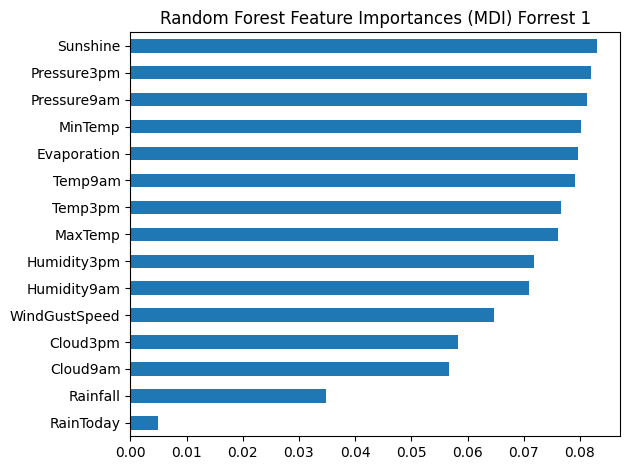

In [42]:
# feature improtances
mdi_importances = pd.Series(
    Forrest1.feature_importances_, index=list(x_train.columns)
).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI) Forrest 1")
ax.figure.tight_layout()

In [43]:
# test the model 1
print("trainning accuracy:")
train_acc5 = Forrest1.predict(x_train)
print(accuracy_score(train_acc5,y_train))
print("validation accuracy:")
prediction5=Forrest1.predict(x_validate)
print(accuracy_score(y_validate, prediction5))

trainning accuracy:
0.99964644182986
validation accuracy:
0.7814863192630276


In [44]:
# build RandomForest with higher leaf size and min_samples_leaf
ForrestModel2=RandomForestClassifier(
                n_estimators=100, criterion="entropy", max_depth=5,
                min_samples_leaf=100, max_features="sqrt",
                random_state=0
                )
Forrest2=ForrestModel1.fit(x_train,y_train['RainTomorrow'])

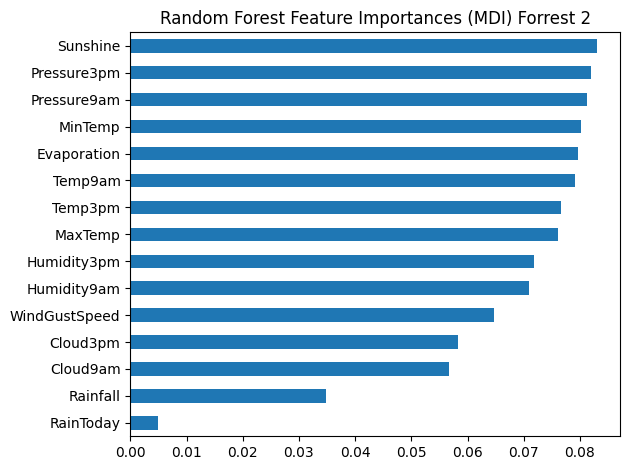

In [45]:
# feature improtances
mdi_importances = pd.Series(
    Forrest2.feature_importances_, index=list(x_train.columns)
).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI) Forrest 2")
ax.figure.tight_layout()

In [46]:
# test the model 2
print("trainning accuracy:")
train_acc6 = Forrest2.predict(x_train)
print(accuracy_score(train_acc6,y_train))
print("validation accuracy:")
prediction6=Forrest2.predict(x_validate)
print(accuracy_score(y_validate, prediction6))

trainning accuracy:
0.99964644182986
validation accuracy:
0.7814863192630276


In [53]:
# try number of tree = 20
ForrestModel3=RandomForestClassifier(
                n_estimators=20, criterion="gini", max_depth=5,
                min_samples_leaf=100, max_features="sqrt",
                random_state=0
                )
Forrest3=ForrestModel1.fit(x_train,y_train['RainTomorrow'])

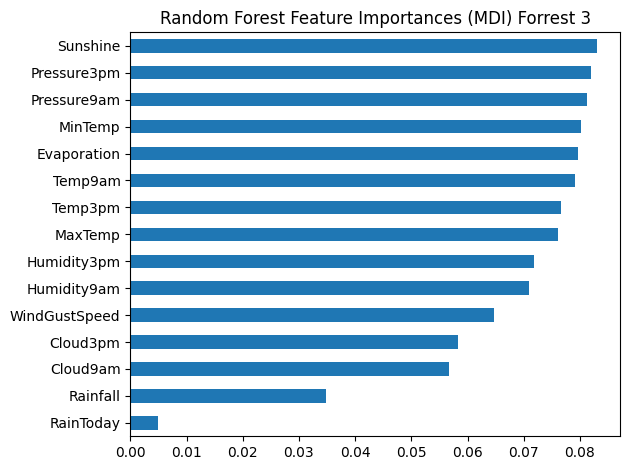

In [54]:
# feature improtances
mdi_importances = pd.Series(
    Forrest3.feature_importances_, index=list(x_train.columns)
).sort_values(ascending=True)
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI) Forrest 3")
ax.figure.tight_layout()

In [55]:
# test the model 3
print("trainning accuracy:")
train_acc7 = Forrest3.predict(x_train)
print(accuracy_score(train_acc7,y_train))
print("validation accuracy:")
prediction7=Forrest3.predict(x_validate)
print(accuracy_score(y_validate, prediction7))

trainning accuracy:
0.99964644182986
validation accuracy:
0.7814863192630276


In [52]:
#either one is the same, choose forest1 to check the accuracy for test data
print("test accuracy:")
acc2=Forrest1.predict(x_test)
print(accuracy_score(y_test, acc2))

test accuracy:
0.7750584353086759
